## Fraud Detection in Credit Card Transactions using ML Techniques


### Data Description

The [dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud/data) contains two-days credit card transactions made in September 2013 by European cardholders. The dataset is highly unbalanced with a low percentage of fraudulent transactions within several records of normal transactions. The positive class (frauds) account for 0.172% (492 frauds out of 284,807 transactions) of all transactions.

Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.  Feature 'Class' is the target variable with value 1 in case of fraud and 0 otherwise. 

# Download the Dataset from 
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Import Libraries

In [1]:
# Import basic libraries 
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
 
from collections import Counter
import seaborn as sn

# scikit packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn import metrics

# settings
%matplotlib inline
sn.set_style("dark")
sn.set_palette("colorblind")

In [2]:
df = pd.read_csv("creditcard.csv")
df = df.head(10000)


In [3]:
# View top 5 records
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# determine the number of records in the dataset
print('The dataset contains {0} rows and {1} columns.'.format(df.shape[0], df.shape[1]))

The dataset contains 10000 rows and 31 columns.


In [5]:
# check for missing values and data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10000 non-null  float64
 1   V1      10000 non-null  float64
 2   V2      10000 non-null  float64
 3   V3      10000 non-null  float64
 4   V4      10000 non-null  float64
 5   V5      10000 non-null  float64
 6   V6      10000 non-null  float64
 7   V7      10000 non-null  float64
 8   V8      10000 non-null  float64
 9   V9      10000 non-null  float64
 10  V10     10000 non-null  float64
 11  V11     10000 non-null  float64
 12  V12     10000 non-null  float64
 13  V13     10000 non-null  float64
 14  V14     10000 non-null  float64
 15  V15     10000 non-null  float64
 16  V16     10000 non-null  float64
 17  V17     10000 non-null  float64
 18  V18     10000 non-null  float64
 19  V19     10000 non-null  float64
 20  V20     10000 non-null  float64
 21  V21     10000 non-null  float64
 22 

### Explore label class

In [6]:
print('Normal transactions count: ', df['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', df['Class'].value_counts().values[1])

Normal transactions count:  9962
Fraudulent transactions count:  38


### Separate feature data (predictors) from labels

In [7]:
# feature data (predictors)
X = df.iloc[:, :-1]

# label class
y = df['Class']

### Standardize data
Scale the data to have zero mean and unit variance.

In [8]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Partition data into train and test sets

In [9]:
# Partition data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=42)

### Train Models  
Three machine learning algorithms: Logistic Regression, Naive Baye, and RandomForest classifiers were trained using the processed feature data.

In [10]:
# X_train, y_train = X_res, y_res 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression()
LGR_Classifier.fit(X_train, y_train);

# Train Decision Tree Model
RDF_Classifier = RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_train, y_train);

# Train Bernoulli Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train);

### Evaluate Models  

In [11]:
# Evaluate models
modlist = [('RandomForest Classifier', RDF_Classifier),('LogisticRegression', LGR_Classifier),
('Naive Baiye Classifier', BNB_Classifier)] 

models = [j for j in modlist]

print()
print('========================== Model Evaluation Results ========================' "\n")  

for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train))
    print('===== {} ====='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification) 
    print()


========================== Model Evaluation Results ========================

===== RandomForest Classifier =====

Cross Validation Mean Score:  100.0%

Model Accuracy:  100.0%

Confusion Matrix:
 [[6679    0]
 [   0   21]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6679
           1       1.00      1.00      1.00        21

    accuracy                           1.00      6700
   macro avg       1.00      1.00      1.00      6700
weighted avg       1.00      1.00      1.00      6700


===== LogisticRegression =====

Cross Validation Mean Score:  100.0%

Model Accuracy:  100.0%

Confusion Matrix:
 [[6679    0]
 [   0   21]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6679
           1       1.00      1.00      1.00        21

    accuracy                           1.00      6700
   macro avg       1.00      1.00     

# Ploting the Graph

In [12]:
from sklearn import metrics

def plot_confusion_matrix(cm, classes, title, cmap):
    "function for plotting confusion matrix"
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    classnames = classes
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classnames))
    plt.xticks(tick_marks, classnames, rotation=45)
    plt.yticks(tick_marks, classnames)
    s = [['TN','FP'], ['FN', 'TP']]
 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()


def plot_roc_auc(arg1, arg2, arg3):
    "a function to plot roc_auc"
    fig, ax = plt.subplots(figsize=(8, 6))
    for i, v in arg1: 
        y_score = v.predict_proba(arg2)[:, 1]
        fpr, tpr, _ = metrics.roc_curve(arg3, y_score) 
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr,lw=2, label= i + ' (area = %0.2f)' % roc_auc) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()   


### Test Models


========================== Model Test Results ========================

=== RandomForest Classifier ===
Model Accuracy:  99.9%

Confusion Matrix:
 [[3283    0]
 [   3   14]]



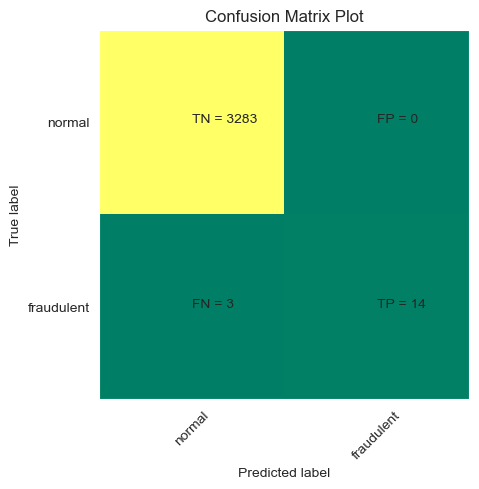


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3283
           1       1.00      0.82      0.90        17

    accuracy                           1.00      3300
   macro avg       1.00      0.91      0.95      3300
weighted avg       1.00      1.00      1.00      3300


=== LogisticRegression ===
Model Accuracy:  99.9%

Confusion Matrix:
 [[3283    0]
 [   2   15]]



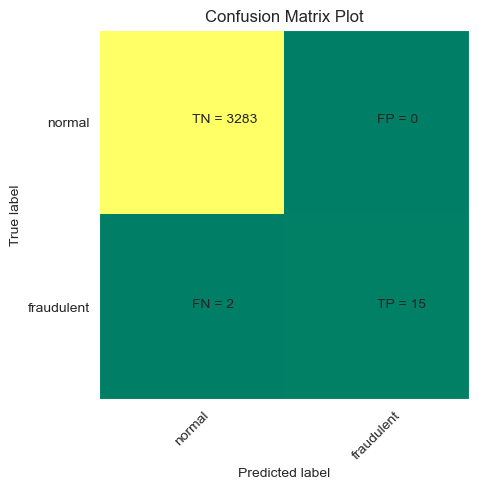


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3283
           1       1.00      0.88      0.94        17

    accuracy                           1.00      3300
   macro avg       1.00      0.94      0.97      3300
weighted avg       1.00      1.00      1.00      3300


=== Naive Baiye Classifier ===
Model Accuracy:  99.8%

Confusion Matrix:
 [[3281    2]
 [   3   14]]



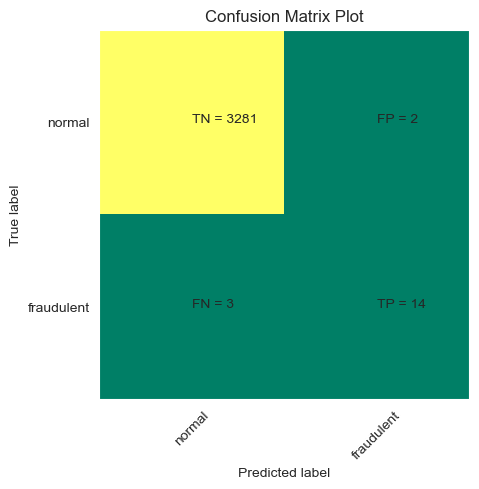


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3283
           1       0.88      0.82      0.85        17

    accuracy                           1.00      3300
   macro avg       0.94      0.91      0.92      3300
weighted avg       1.00      1.00      1.00      3300


============================= ROC Curve ===============================



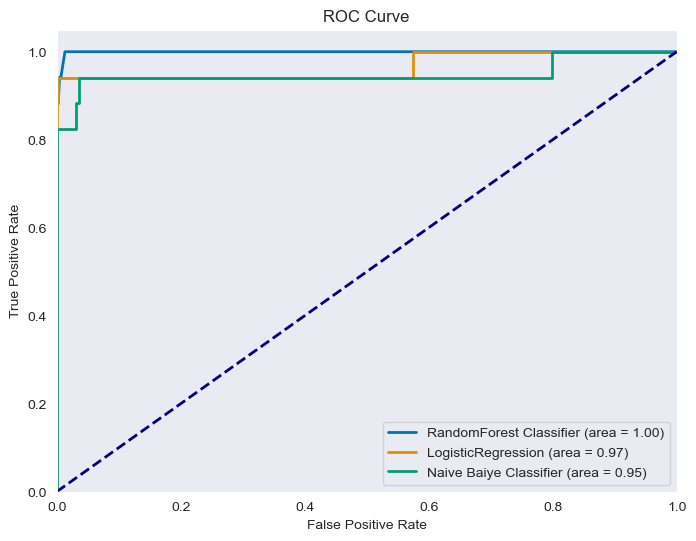

In [13]:
# Test models
classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Test Results ========================' "\n")   

for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))   
    print('=== {} ==='.format(i))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    plot_confusion_matrix(confusion_matrix, classes = list(classdict.keys()), title='Confusion Matrix Plot', cmap=plt.cm.summer)
    print() 
    print("Classification Report:" "\n", classification) 
    print() 

print('============================= ROC Curve ===============================' "\n")      
plot_roc_auc(arg1=models, arg2=X_test, arg3=y_test)